In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
#import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes,mark_inset

In [3]:
# Install a conda package in the current Jupyter kernel
#import sys

#!conda install --yes --prefix {sys.prefix} seaborn

In [4]:
dfpersons=pd.read_csv('./raw-updated/persons.csv')

In [5]:
dfact=pd.read_csv('./raw-updated/activities.csv')

In [6]:
df=pd.read_csv('./raw-updated/trips.csv')

In [7]:
dfc=df.copy()

In [8]:
dfc['duration']=(dfc['arrival_time']-dfc['departure_time'])/3600

In [9]:
purposes=np.delete(dfc.following_purpose.unique(), [0, 1])

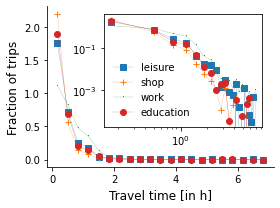

In [10]:
n=3.

fig, ax=plt.subplots(tight_layout=True, figsize=(4,3))

#fig = plt.figure()
#ax = plt.subplot()
marker = itertools.cycle(('-s', '-+', '-,', '-o', '-*')) 
#axins = zoomed_inset_axes(ax, 1.3, loc='lower left', axes_kwargs={"facecolor" : "lightgray"})
axins = ax.inset_axes([0.25, 0.25, 0.7, 0.7])

for purpose in purposes: 
    p=np.histogram(dfc[dfc.following_purpose==purpose]['duration'].values, bins=np.arange(7*n+1)/n, density=True)
    x=(p[1][1:]+p[1][:-1])/2
    y=p[0]
    m=next(marker)
    ax.plot(x,y, m, lw=0.2, label=purpose )#mew=0.5, mec='k'
    axins.loglog(x,y, m, lw=0.2, label=purpose)#mew=0.5, mec='k', ms=5.
    

axins.legend(prop={'size': 10}, loc='lower left', frameon=False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.set_xlabel('Travel time [in h]', fontsize='large')
ax.set_ylabel('Fraction of trips', fontsize='large')

ax.set_xticks([0, 2, 4, 6])
fig.savefig('fig1.pdf', bbox_inches='tight')
plt.show()

In [11]:
modes=dfc['mode'].unique()

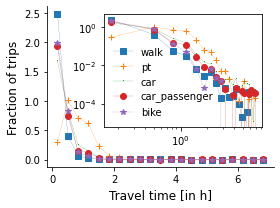

In [12]:
n=3.

fig, ax=plt.subplots(tight_layout=True, figsize=(4,3))

#fig = plt.figure()
#ax = plt.subplot()
marker = itertools.cycle(('-s', '-+', '-,', '-o', '-*')) 
#axins = zoomed_inset_axes(ax, 1.3, loc='lower left', axes_kwargs={"facecolor" : "lightgray"})
axins = ax.inset_axes([0.25, 0.25, 0.7, 0.7])

for mode in modes: 
    p=np.histogram(dfc[dfc['mode']==mode]['duration'].values, bins=np.arange(7*n+1)/n, density=True)
    x=(p[1][1:]+p[1][:-1])/2
    y=p[0]
    m=next(marker)
    ax.plot(x,y, m, lw=0.2, label=mode) #, mew=0.5, mec='k'
    axins.loglog(x,y, m, lw=0.2, label=mode) #, mew=0.5, mec='k', ms=5.
    #axins.set_aspect('equal', 'box')
    

axins.legend(prop={'size': 10}, loc='lower left', frameon=False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.set_xlabel('Travel time [in h]', fontsize='large')
ax.set_ylabel('Fraction of trips', fontsize='large')

ax.set_xticks([0, 2, 4, 6])
#ax.set_aspect('equal', 'box')


fig.savefig('fig2.pdf', bbox_inches='tight')
plt.show()

In [13]:
dfc.shape

(41703206, 11)

In [14]:
od_overall=pd.crosstab(dfc.oinsee, dfc.dinsee)

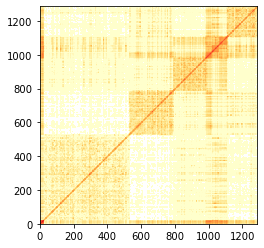

In [15]:
import matplotlib as mpl

plt.imshow(od_overall, cmap='YlOrRd', origin='lower', norm=mpl.colors.LogNorm(vmin=1))

In [16]:
cmatrix=np.load('cmatrix.npy')

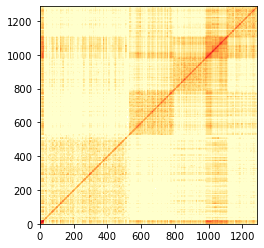

In [17]:
plt.imshow(cmatrix, cmap='YlOrRd', origin='lower', norm=mpl.colors.LogNorm(vmin=1))

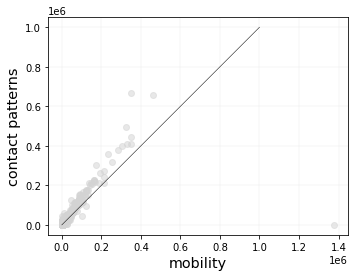

In [18]:
fig, ax=plt.subplots()

ax.plot(od_overall.values.reshape(-1), cmatrix.reshape(-1), 'o', color='lightgray', alpha=0.5)
ax.grid(True, lw=0.1)
ax.plot([1/5, 10**6],[1/5, 10**6], '-',color='k', lw=0.5)
ax.set_xlabel('mobility', fontsize='x-large')
ax.set_ylabel('contact patterns', fontsize='x-large')
ax.set_aspect('equal', 'box')
#ax.set_xlim(-10, 10**6)
#ax.set_ylim(-10, 10**6)

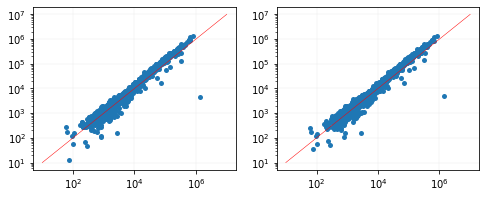

In [19]:
fig, ax=plt.subplots(ncols=2, figsize=(4*2,3))

ax[0].loglog(od_overall.values.sum(axis=1), cmatrix.sum(axis=1),'.', mec='k', mew=.0, ms=10., label='Origin')
#ax[0].legend(frameon=False, fontsize='large', loc='best')
ax[0].loglog([10, 10000000], [10, 10000000], color='r', lw=0.5)
ax[0].grid(True, lw=0.1)
#ax[0].set_aspect('equal', 'box')


ax[1].loglog(od_overall.values.sum(axis=0), cmatrix.sum(axis=0),'.', mec='k', mew=.0, ms=10., label='Destination')
#ax[1].legend(frameon=False, fontsize='large', loc='best')
ax[1].loglog([10, 10000000], [10, 10000000], color='r', lw=0.5)
ax[1].grid(True, lw=0.1)



In [20]:
od_overall

dinsee,-1,75101,75102,75103,75104,75105,75106,75107,75108,75109,...,95652,95656,95658,95660,95675,95676,95678,95680,95682,95690
oinsee,,,,,,,,,,,,,,,,,,,,,
-1,1376946,5,3,0,3,10,0,4,4,0,...,6,2,0,1,5,0,0,2,2,0
75101,5,40223,7182,2593,4082,2043,3669,3359,3685,4792,...,5,1,4,1,0,0,0,75,1,0
75102,1,7293,30259,3515,1217,798,895,1163,1522,7280,...,2,0,0,0,1,0,1,31,1,0
75103,0,2558,3512,47683,7184,1590,1112,978,1293,2117,...,0,0,0,1,1,0,1,36,1,0
75104,3,4026,1161,7167,48846,5836,2129,1191,1159,1380,...,6,0,0,0,2,0,1,35,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95676,0,0,0,0,0,0,0,1,0,0,...,0,8,0,0,0,181,0,0,0,2
95678,0,1,0,1,1,0,0,0,0,3,...,3,0,0,0,0,0,616,7,0,0
95680,3,82,30,35,37,69,77,51,175,123,...,26,0,0,14,18,0,9,43452,14,0


In [21]:
gdf1=gpd.read_file('data/dep/geoflar-departements.shp').to_crs(2154) #.to_crs(3857)
gdf2=gpd.read_file('data/communes/communes-dile-de-france-au-01-janvier.shp').to_crs(2154) #.to_crs(3857)

In [22]:
gdf2.crs==gdf1.crs

True

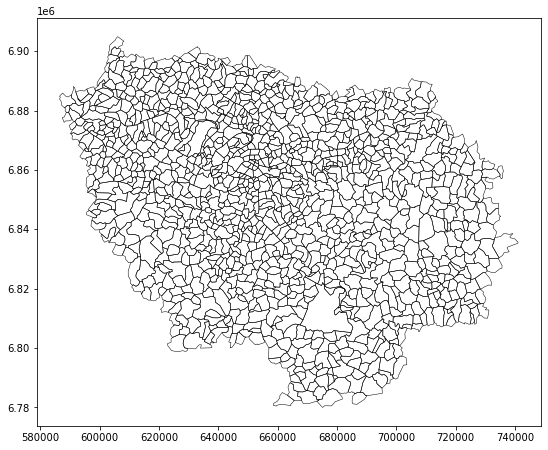

In [23]:
scale=2.5
fig, ax=plt.subplots(figsize=(4*scale, 3*scale))
#gdf1.boundary.plot(color='k', ax=ax)
gdf2.boundary.plot(color='k', ax=ax, lw=0.5)
#plt.axis('off')
#gdf.plot(color='k', ax=ax, lw=5.)
plt.show()

In [36]:
mmax

24860

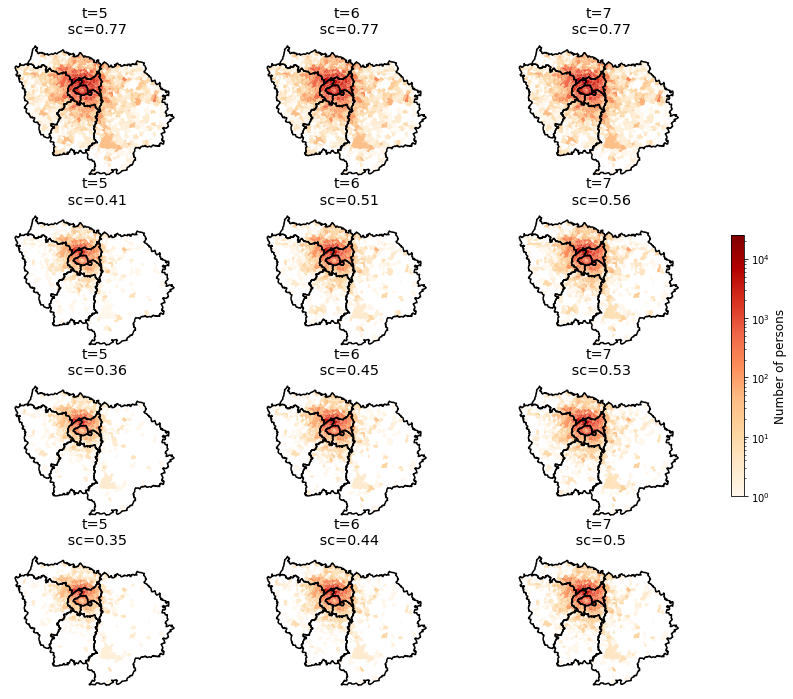

In [41]:
policy=['baseline', 'wfh25', 'wfh50', 'wfh75']
nrows=len(policy)

mmax=24860 # computed a posteriori
norm=mpl.colors.LogNorm(vmin=1, vmax=mmax)

nb_ts=8
cc=np.arange(nb_ts)[5:]
ncols=len(cc)

scale=4.
fig, axs=plt.subplots(figsize=(4*scale, 3*scale), ncols=ncols, nrows=nrows, tight_layout=False)

axes=iter(axs.reshape(-1))

for py in policy:
    for i in cc:
        ax=next(axes)
        
        dfr=pd.read_csv(py+'_state_'+str(i)+'.csv')
        dfr=dfr[~dfr['insee'].isin([-1, 0])]

        gdf1.boundary.plot(color='k', ax=ax)
        gdfr=gdf2[['insee','geometry']].merge(dfr, on='insee')
        gdfr.plot(column='counts', cmap='OrRd', ax=ax, norm=norm, legend=False, legend_kwds={'shrink': 0.15})
        ax.set_title('t={}\n '.format(i)+'sc='+str(np.round(len(dfr)/len(gdf2), 2)), fontsize='x-large')
        ax.set_ylabel(py, fontsize='x-large')
        ax.axis('off')
        

        

# Create a ScalarMappable object using the colormap used in the plots
scalar_mappable = plt.cm.ScalarMappable(cmap='OrRd', norm=norm)

# Set the limits of the ScalarMappable object
scalar_mappable.set_array(np.linspace(0, mmax, 10))

# Add the colorbar to one of the subplots
cbar=fig.colorbar(scalar_mappable, ax=axs, orientation='vertical', shrink=0.4)
cbar.set_label('Number of persons', fontsize=12)

# Create a new axis for the colorbar
#cax = cbar.ax
#cax_divider = make_axes_locatable(cax)
#cax_new = cax_divider.append_axes("bottom", size="5%", pad=0.3)
#cbar_new = plt.colorbar(sc, cax=cax_new, orientation='horizontal')

fig.savefig('paper/spatial_propagation.pdf', bbox_inches='tight')
plt.show()

TypeError: '<=' not supported between instances of 'list' and 'int'

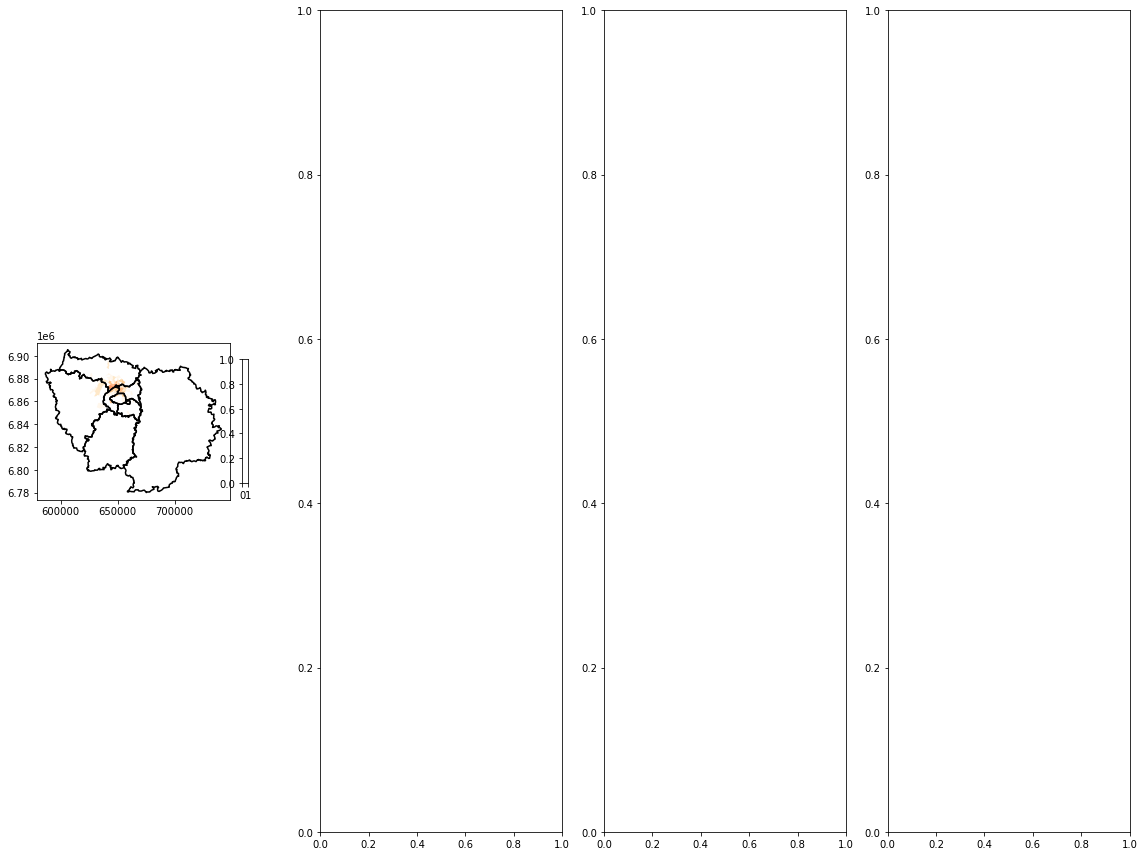

In [25]:
n=4
policy='wfh25'

scale=4.
fig, axs=plt.subplots(figsize=(4*scale, 3*scale), ncols=n, tight_layout=True)

for i, ax in zip([2, 3, 4, 5], axs.reshape(-1)): 
    dfr=pd.read_csv(policy+'_state_'+str(i)+'.csv')
    dfr=dfr[~dfr['insee'].isin([-1, 0])]

    gdf1.boundary.plot(color='k', ax=ax)
    gdfr=gdf2[['insee','geometry']].merge(dfr, on='insee')
    gdfr.plot(column='counts', cmap='OrRd', ax=ax, norm=mpl.colors.LogNorm(vmin=1, vmax=gdfr.counts.max()), legend=True, legend_kwds={'shrink': 0.15})
    ax.set_title('t={}\n '.format(i)+'sc='+str(np.round(len(dfr)/len(gdf2), 2)), fontsize='x-large')
    ax.axis('off')
    
fig.savefig('paper/spatial_propagation'+policy+'.pdf', bbox_inches='tight')

In [ ]:
len(dfr)

In [ ]:
len(gdf2)

In [ ]:
threshold=50000
ifx=od_overall.iloc[1:,1:].columns
f=(od_overall.iloc[1:,1:]>threshold).values
np.where(f==True)

In [ ]:
od=od_overall.iloc[1:,1:]

In [ ]:
od.sum(axis=1)

In [ ]:
o, d, w, io, idd=[], [], [], [], []

for index, k in zip(od.stack().index, od.stack()):
    if k>1000 and (index[0]!=index[1]) and index[0]<76000:
        o.append(gdf2[gdf2['insee'].isin([index[0]])].centroid.values[0])
        d.append(gdf2[gdf2['insee'].isin([index[1]])].centroid.values[0])
        w.append(k)
        
        io.append(gdf2[gdf2['insee'].isin([index[0]])]['insee'].values[0])
        idd.append(gdf2[gdf2['insee'].isin([index[1]])]['insee'].values[0])
        
print(len(w))

In [ ]:
import geopandas as gpd

from shapely.geometry import LineString
from shapely import wkt

df=pd.DataFrame({'fr_point':o, 'to_point':d, 'weight': w})
df['line'] = df.apply(lambda row: LineString([row['fr_point'], row['to_point']]), axis=1) #Create a linestring column

gdf=gpd.GeoDataFrame(df, geometry='line')



In [ ]:
od.sum(axis=1).reset_index().rename({0:'freq'}, axis=1)

In [ ]:
gdf2=gdf2.merge(od.sum(axis=1).reset_index().rename({0:'freq'}, axis=1), left_on='insee', right_on='oinsee')

import matplotlib as mpl

scale=1.75
fig, ax=plt.subplots(figsize=(4*scale, 3*scale), tight_layout=True)

gdf2.plot(column='freq', lw=0.1, ax=ax, norm=mpl.colors.LogNorm(vmin=gdf2.freq.min(), vmax=gdf2.freq.max()), cmap='YlOrRd', 
          legend=True, legend_kwds={'shrink': 0.6}) # #33ccff
# [gdf2.insee.isin(list(np.unique(idd)))]

#gdf1[gdf1.code_dept.isin(['75', '92', '93', '94'])].boundary.plot(color='k', ax=ax)
gdf1.boundary.plot(color='k', ax=ax, lw=1.)

#gdf2.boundary.plot(color='lightgrey', ax=ax, lw=0.1)
gdf2[gdf2.numdep.isin([75, 92, 93, 94])].boundary.plot(color='k', ax=ax, lw=0.1)
#plt.axis('off')
#gdf.plot(color='k', ax=ax, lw=5.)

#gdf.plot(column='weight', cmap='YlOrRd', ax=ax,norm=mpl.colors.LogNorm(vmin=gdf.weight.min(), vmax=gdf.weight.max()), lw=2.)
ax.set_title('Daily aggregated # of departures', fontsize='x-large')

plt.axis('off')

fig.savefig('fig5.pdf', bbox_inches='tight')
plt.show()

In [ ]:
dfc['mode'].value_counts().index

In [ ]:
plt.bar(dfc['mode'].value_counts().index, dfc['mode'].value_counts().values, width=0.3)

In [ ]:
dfc.head()

In [ ]:
bins=np.arange(25)

dep=np.histogram(dfc['departure_time']/3600, bins)

In [ ]:
arr=np.histogram(dfc['arrival_time']/3600, bins)

In [ ]:
dep=np.histogram(dfc['departure_time']/3600, bins)
arr=np.histogram(dfc['arrival_time']/3600, bins)

scale=2.5
fig, ax =plt.subplots(figsize=(5*scale, 3*scale), tight_layout=True)

ax.plot(dep[0], '-',label='departures')
ax.plot(arr[0], '--',label='arrivals')
ax.plot(np.cumsum(dep[0])-np.cumsum(arr[0]), '-s',label='on-going', lw=0.25)


ax.legend(loc='best', fontsize='large', frameon=False)
#ax.grid(True, lw=0.1)
ax.set_xlabel('Time of day [h]', fontsize='x-large')
ax.set_ylabel('# of trips', fontsize='x-large')
ax.set_title('Trip patterns in Île-de-France', fontsize='x-large')

fig.savefig('fig3.pdf', bbox_inches='tight')

In [ ]:
dfc[dfc['following_purpose']=='work'].head()

In [ ]:
def get_histograms(dfc):
    bins=np.arange(25)
    dep=np.histogram(dfc['departure_time']/3600, bins)
    arr=np.histogram(dfc['arrival_time']/3600, bins)
    return dep, arr

In [ ]:
scale=1.
fig, ax =plt.subplots(figsize=(5*scale, 3*scale), tight_layout=True)

#ax.plot(dep[0], '-',label='departures')
#ax.plot(arr[0], '--',label='arrivals')


dep, arr=get_histograms(dfc[dfc['following_purpose']=='work'])
ax.plot(np.cumsum(dep[0])-np.cumsum(arr[0]), '-o',label='work', lw=0.25)

dep, arr=get_histograms(dfc[dfc['following_purpose']=='education'])
ax.plot(np.cumsum(dep[0])-np.cumsum(arr[0]), '-o',label='education', lw=0.25)

dep, arr=get_histograms(dfc[dfc['following_purpose']=='leisure'])
ax.plot(np.cumsum(dep[0])-np.cumsum(arr[0]), '-',label='leisure')

dep, arr=get_histograms(dfc[dfc['following_purpose']=='shop'])
ax.plot(np.cumsum(dep[0])-np.cumsum(arr[0]), '--',label='shop')

ax.legend(loc='best', fontsize='x-large', frameon=False)
#ax.grid(True, lw=0.1)
ax.set_xlabel('Time of day [h]', fontsize='x-large')
ax.set_ylabel('# of trips', fontsize='x-large')
ax.set_title('Trip patterns in Île-de-France', fontsize='x-large')

fig.savefig('fig4.pdf', bbox_inches='tight')

In [ ]:
dfact.head()

In [ ]:
dfact_work=dfact[dfact['purpose'].isin(['work'])]

In [ ]:
dfact_work['start_time']

In [ ]:
dfact_work['end_time']

In [ ]:
def get_histograms_from_activities(dfc):
    bins=np.arange(25)
    dep=np.histogram(dfc['start_time']/3600, bins)
    arr=np.histogram(dfc['end_time']/3600, bins)
    return dep, arr

In [ ]:
scale=1.
fig, ax =plt.subplots(tight_layout=True)

for k in ['work', 'education', 'leisure', 'shop']:
    dfact_work=dfact[dfact['purpose'].isin([k])]

    dep, arr=get_histograms_from_activities(dfact_work)
    ax.plot(np.cumsum(dep[0])-np.cumsum(arr[0]), '-o',label=k, lw=0.25)
    
ax.legend(fontsize='x-large', frameon=False, loc='best')
ax.set_xlabel('Time of day [in h]', fontsize='x-large')
ax.set_ylabel('# of engaged people', fontsize='x-large')
fig.savefig('fig6.pdf', bbox_inches='tight')

In [ ]:
bins=np.arange(25)
A=plt.hist(dfact_work['start_time']/3600, bins, histtype='step')
B=plt.hist(dfact_work['end_time']/3600, bins, histtype='step')
plt.plot(np.cumsum(A[0])-np.cumsum(B[0]), '-o',label='work', lw=0.25)

In [ ]:
bins=np.arange(10)*10

a,b=np.histogram(dfpersons[dfpersons['sex'].isin(['male'])]['age'], bins, density=True)

labels=[]
for k in range(len(b)-1):
    labels.append(str(int(b[k]))+'-'+str(int(b[k+1]))+' y')

fig, ax = plt.subplots()
ax.barh(labels, a, align='center', label='male')

a,b=np.histogram(dfpersons[dfpersons['sex'].isin(['female'])]['age'], bins, density=True)
ax.barh(labels, -a, align='center', label='female')

#ax.set_xticks([])
ax.set_ylabel('5-year age groups', fontsize='large')
ax.set_xlabel('Fraction of population (in %)', fontsize='large')

xtl=ax.get_xticks()
ax.set_xticks(xtl)
ax.set_xticklabels(np.round(np.abs(xtl), 3)*100)

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.set_title('Study population by age and gender', fontsize='large')
ax.legend(fontsize='large', frameon=False)

plt.show()

In [ ]:
df_contacts=pd.read_csv('resultsA.csv').drop(['Unnamed: 0'], axis=1)
df_contacts['age_d']=pd.cut(df_contacts['age'], bins=[0, 5, 10, 15, 20, 25, 35, 45, 65, 120], labels=['0-4', '5-9', '10-14', '15-19', '20-24', '25-34', '35-44', '45-64', '65+'])

In [ ]:
scale=0.9

fig, ax=plt.subplots(figsize=(10*scale, 3*scale), tight_layout=True)
sns.boxplot(y='contacts', x='age_d', data=df_contacts, hue=None, ax=ax, showfliers=False, width=0.25, color='lightgray')
ax.set_xlabel('Age',fontsize='large')
ax.set_ylabel('Contact rate',fontsize='large')
ax.plot(np.array([8.64, 10.5, 12.92, 12.96, 11.14, 9.95, 9.93, 9.24, 7.01]), '-', lw=2., color='red')
ax.legend(['mobility model', 'contact survey'], fontsize='large', frameon=False, loc='upper right')
fig.savefig('paper/fig10.pdf', bbox_inches='tight')
#ax.set_ylim(0, 50)

In [ ]:
df=pd.read_csv('bp.csv')

df['binned']=pd.cut(x=df['age'], bins=[0, 5, 10, 15, 20, 25, 35, 45, 65, 120])

scale=1.

fig, ax=plt.subplots(figsize=(12*scale, 3*scale), tight_layout=True)
bp = sns.boxplot(y='degree', x='binned', data=df, palette="colorblind", hue='ref', showfliers=False, ax=ax, width=0.4)
ax.legend(frameon=False, loc='upper right', fontsize='x-large')
ax.set_xlabel('5-year age group', fontsize='x-large')
ax.set_ylabel('Contact rate', fontsize='x-large')
#ax.legend(['baseline', 'pol-1'])